In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Importing the unique product dataframe, with all its columns
comp_prod = pd.read_csv("Products_with_cust.csv", index_col = 0)
comp_prod.shape

(3623, 18)

In [4]:
comp_prod.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,P00001142
Product_Category_1,3,2,5,5,5,1,5,2,1,1,5
Product_Category_2,4,4,14,8,0,6,14,4,0,2,8
Product_Category_3,5,9,0,0,0,16,0,0,0,16,14
Comb_Cat,3.4.5,2.4.9,5.14.0,5.8.0,5.0.0,1.6.16,5.14.0,2.4.0,1.0.0,1.2.16,5.8.14
Times_Sold,1130,371,238,92,146,512,238,36,54,494,572
Approx_MRP,13716,16503,8896,8891,8903,19705,8902,13322,19154,19670,8903
Common_Cat,1,0,1,1,1,0,1,1,1,0,1
high_spend,1,1,0,0,1,1,1,0,0,1,1
mod_spend,1,1,1,1,1,1,1,1,1,1,1


In [5]:
# Creating a new feature called revenue. It is the total money earned by a retail outlet wrt to a give product
comp_prod["Revenue"] =  comp_prod["Approx_MRP"] * comp_prod["Times_Sold"]

In [6]:
def normalizer(df, colname) : 
    min_val = df[colname].min()
    max_val = df[colname].max()
    dm = max_val - min_val
    new_col = "Norm_" + colname
    df[new_col] = round(((df[colname] -  min_val)/dm),3)
    print(new_col)

In [7]:
normalizer(comp_prod, "Revenue") #Normalizing the feature

Norm_Revenue


In [8]:
comp_prod.shape

(3623, 20)

In [9]:
comp_prod.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Category_1,3623.0,6.469500e+00,3.772242e+00,1.000,5.000,6.000,8.000,18.0
Product_Category_2,3623.0,5.155672e+00,6.193551e+00,0.000,0.000,0.000,11.000,18.0
Product_Category_3,3623.0,1.835495e+00,4.720280e+00,0.000,0.000,0.000,0.000,18.0
Times_Sold,3623.0,1.483790e+02,2.081767e+02,1.000,19.000,70.000,192.000,1858.0
Approx_MRP,3623.0,1.153130e+04,5.293933e+03,405.000,8771.500,9990.000,16338.500,23961.0
Common_Cat,3623.0,8.034778e-01,3.974227e-01,0.000,1.000,1.000,1.000,1.0
high_spend,3623.0,4.700524e-01,4.991712e-01,0.000,0.000,0.000,1.000,1.0
mod_spend,3623.0,9.991720e-01,2.876779e-02,0.000,1.000,1.000,1.000,1.0
low_spend,3623.0,3.949765e-01,4.889131e-01,0.000,0.000,0.000,1.000,1.0
Gender,3623.0,9.711863e-01,1.041562e-01,0.283,1.000,1.000,1.000,1.0


In [10]:
def scatter_plot(df, xaxis, yaxis) :
    f, ax = plt.subplots(figsize = (16,8))
    plt.scatter(x = df[xaxis], y = df[yaxis], c = 'yellowgreen')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    s = yaxis + " wrt " + xaxis
    plt.title(s, fontsize = 30)
    plt.savefig(s + ".jpg")
    plt.show()

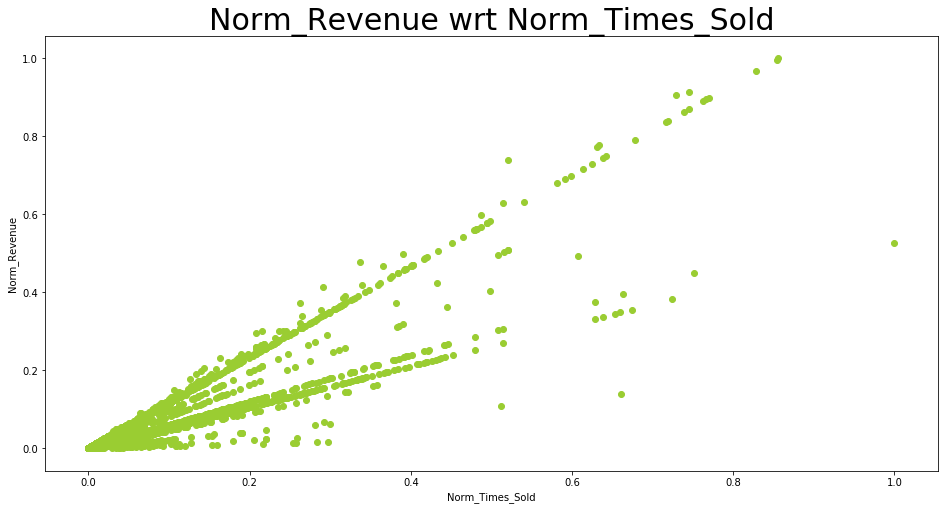

In [11]:
scatter_plot(comp_prod, "Norm_Times_Sold", "Norm_Revenue")

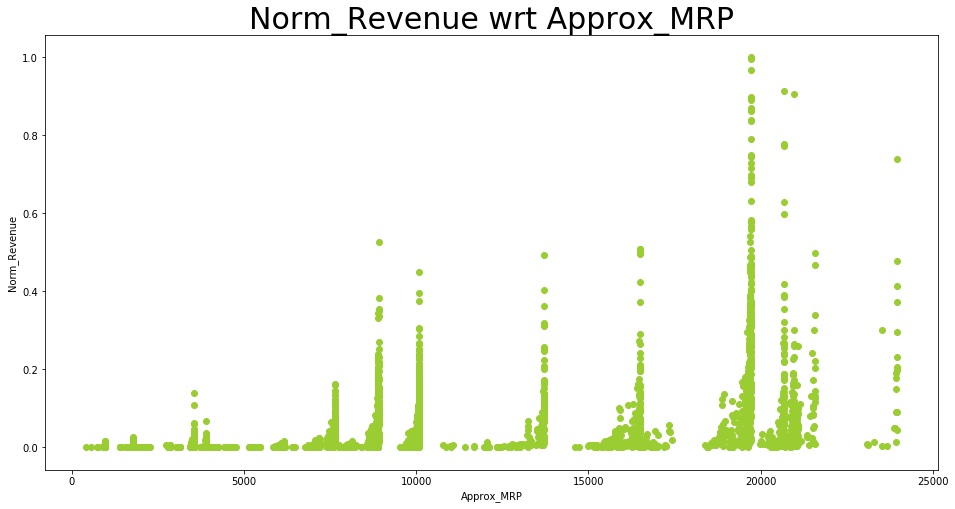

In [12]:
scatter_plot(comp_prod, "Approx_MRP", "Norm_Revenue")

In [13]:
def dist_plot(df, i) : 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 0.8)}, figsize = (16,8))
    
    # Values used to mark the lines in the figure
    mean=df[i].mean()
    median=df[i].median()
    mode=df[i].mode().get_values()[0]
    
    #Creating a boxplot with all the above lines
    sns.boxplot(df[i], ax=ax_box, color = 'forestgreen')
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')
    
    #Creating a distplot with all the above lines
    sns.distplot(df[i], kde = False, color= 'green', ax = ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='k', linestyle='-')
    ax_hist.axvline(mode, color='b', linestyle='-')
    
    #This is used to format and name all the axes in the chart
    plt.legend({'Mean':mean,'Median':median,'Mode':mode}, fontsize = 15)
    ax_box.set(xlabel='')
    plt.xlabel(i, fontsize = 15)
    plt.xticks(fontsize =  15)
    plt.title(i, fontsize = 20)
    plt.yticks(fontsize = 15)
    s = i + " distplot.jpg"
    plt.savefig(s)
    plt.show()

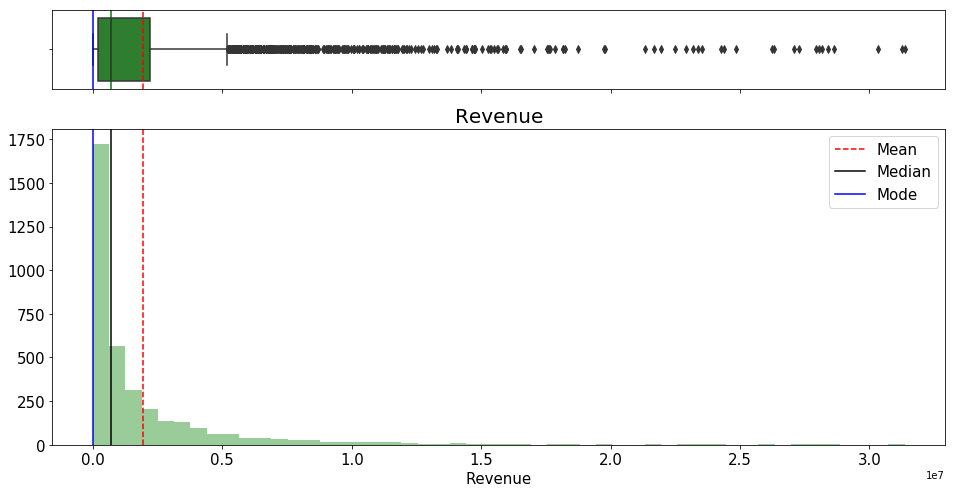

In [436]:
dist_plot(comp_prod, "Revenue")

### Products preferred by all types of customers

In [14]:
all_cust_df = comp_prod.loc[(comp_prod["Gender"] == 1) & (comp_prod["Age"] == 1) & (comp_prod["Occupation"] == 1) & \
             (comp_prod["City_Category"] == 1) & (comp_prod["Stay_In_Current_City_Years"] == 1)]
all_cust_df.shape

(582, 20)

In [15]:
all_types = all_cust_df.loc[(all_cust_df["high_spend"] == 1) & (all_cust_df["low_spend"] == 1) & \
                            (all_cust_df["mod_spend"] == 1)]
all_types.shape

(489, 20)

In [16]:
# There are 489 such products, which are preferred by all types of customers, and are popular among all the spending power range

In [17]:
pr = all_types["Product_ID"].values.tolist()
len(pr)

489

In [18]:
comp_prod["all_types"] = np.nan
comp_prod.loc[comp_prod["Product_ID"].isin(pr), "all_types"] = 1
comp_prod["all_types"].replace(np.nan, 0, inplace = True)

## Clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
!pip install kmodes

In [23]:
from kmodes.kmodes import KModes

In [24]:
kmod  = KModes(n_clusters = 4, init = 'Huang')

In [25]:
# Normalizing product category
col = comp_prod.columns.tolist()[1:]
#for i in col[:3] : 
#    normalizer(comp_prod, i)

In [27]:
xcat = comp_prod[col[:4]]
xcat.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Comb_Cat
0,3,4,5,3.4.5
1,2,4,9,2.4.9
2,5,14,0,5.14.0
3,5,8,0,5.8.0
4,5,0,0,5.0.0


In [28]:
labels =  kmod.fit_predict(xcat)

In [30]:
comp_prod["kmod_cat"] = labels

In [31]:
comp_prod.head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Comb_Cat,Times_Sold,Approx_MRP,Common_Cat,high_spend,mod_spend,...,Age,Occupation,City_Category,Stay_In_Current_City_Years,Norm_Times_Sold,Norm_Approx_MRP,Revenue,Norm_Revenue,all_types,kmod_cat
0,P00000142,3,4,5,3.4.5,1130,13716,1.0,1.0,1.0,...,1.0,1.000,1.0,1.0,0.608,0.565,15499080,0.494,1.0,3
1,P00000242,2,4,9,2.4.9,371,16503,0.0,1.0,1.0,...,1.0,1.000,1.0,1.0,0.199,0.683,6122613,0.195,1.0,3
2,P00000342,5,14,0,5.14.0,238,8896,1.0,0.0,1.0,...,1.0,1.000,1.0,1.0,0.128,0.360,2117248,0.068,0.0,1
3,P00000442,5,8,0,5.8.0,92,8891,1.0,0.0,1.0,...,1.0,0.949,1.0,1.0,0.049,0.360,817972,0.026,0.0,1
4,P00000542,5,0,0,5.0.0,146,8903,1.0,1.0,1.0,...,1.0,0.928,1.0,1.0,0.078,0.361,1299838,0.041,0.0,1


In [41]:
kmod.cluster_centroids_

array([['8', '0', '0', '8.0.0'],
       ['5', '0', '0', '5.0.0'],
       ['1', '2', '16', '1.2.15'],
       ['1', '4', '0', '1.16.0']], dtype='<U11')

In [43]:
xpc = comp_prod[col[:3]]

In [44]:
labels2 = kmod.fit_predict(xpc)

In [131]:
comp_prod["kmod_pc"] = labels2

In [33]:
col = comp_prod.columns.tolist()[8:]
col.remove("all_types")
col.remove('Revenue')
col.remove('kmod_cat')
for i in col : 
    print(i , end = '\t')

high_spend	mod_spend	low_spend	Gender	Age	Occupation	City_Category	Stay_In_Current_City_Years	Norm_Times_Sold	Norm_Approx_MRP	Norm_Revenue	

In [34]:
cluster_df, sse = comp_prod[col], []

In [35]:
cluster_df.describe().T

,count,mean,std,min,25%,50%,75%,max
high_spend,3623.0,0.470052,0.499171,0.000,0.000,0.000,1.000,1.0
mod_spend,3623.0,0.999172,0.028768,0.000,1.000,1.000,1.000,1.0
low_spend,3623.0,0.394977,0.488913,0.000,0.000,0.000,1.000,1.0
Gender,3623.0,0.971186,0.104156,0.283,1.000,1.000,1.000,1.0
Age,3623.0,0.881498,0.209588,0.037,0.873,1.000,1.000,1.0
Occupation,3623.0,0.783633,0.278424,0.003,0.667,0.924,0.989,1.0
City_Category,3623.0,0.942903,0.179137,0.177,1.000,1.000,1.000,1.0
Stay_In_Current_City_Years,3623.0,0.922306,0.194960,0.131,1.000,1.000,1.000,1.0
Norm_Times_Sold,3623.0,0.079373,0.112079,0.000,0.010,0.037,0.103,1.0
Norm_Approx_MRP,3623.0,0.472356,0.224702,0.000,0.355,0.407,0.676,1.0


In [507]:
cluster_df.loc[cluster_df["Occupation"] == 'A'].T

""
high_spend
mod_spend
low_spend
Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Norm_Times_Sold
Norm_Approx_MRP


In [36]:
cluster_df.shape

(3623, 11)

In [37]:
sse = []
for i in range(1,10) :
    k = KMeans(n_clusters = i)
    k.fit(cluster_df)
    sse.append(k.inertia_)

Text(0.5, 1.0, 'Elbow Plot')

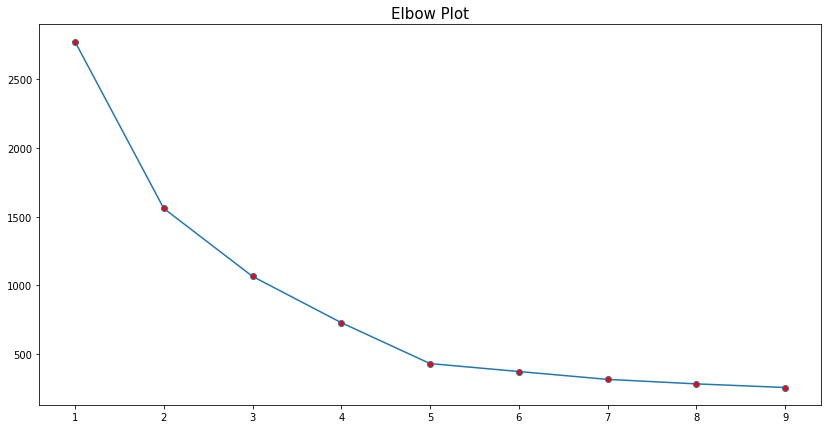

In [46]:
plt.figure(figsize = (14,7) )
plt.plot(range(1,10), sse, '-o', markerfacecolor = 'r')
plt.title("Elbow Plot", fontsize = 15)

In [183]:
# From the above figure, it looks like the optimal number of clusters can be between 3,4,5,6 and 7

In [47]:

def silhouette_plot(df, n) :
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_ylim([0, len(df) + (i+ 1) * 10])
    ax1.set_xlim([-0.2, 1])
    
    k = KMeans(n_clusters = i, random_state = 12)
    labels = k.fit_predict(df)
    
    silhouette_avg = silhouette_score(df, labels)
    
    
    sample_silhouette_values = silhouette_samples(df, labels)
    
    y_lower = 10
    for n in range(i):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == n]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(n) / i)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, \
                          edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(n))
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  
    
    colors = cm.nipy_spectral(labels.astype(float) / i)
    ax2.scatter(df["Norm_Revenue"], df["Norm_Times_Sold"], marker='.', s=30, \
                lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for Revenue")
    ax2.set_ylabel("Feature space for Times_Sold")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % i), fontsize=14, fontweight='bold')
    plt.show()

In [48]:
def p_f_val(df, num, cat_col) : 
    s = num + " ~ " + cat_col
    mod = ols(s, data = df).fit()
    aov_table = sm.stats.anova_lm(mod)
    p = round((aov_table["PR(>F)"][0]),6)
    f = aov_table["F"][0]
    return [p,f]

In [49]:
def km_cluster (df, n) : 
    km = KMeans(n_clusters=n, random_state= 12)
    s = "km_" + str(n)
    labels = km.fit_predict(df)
    silhouette_plot(df,n)
    comp_prod[s] = labels
    return s

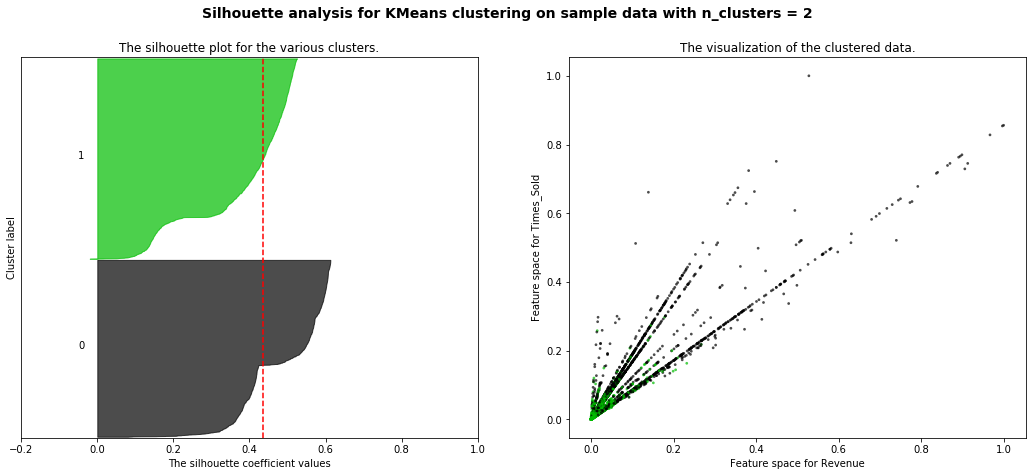

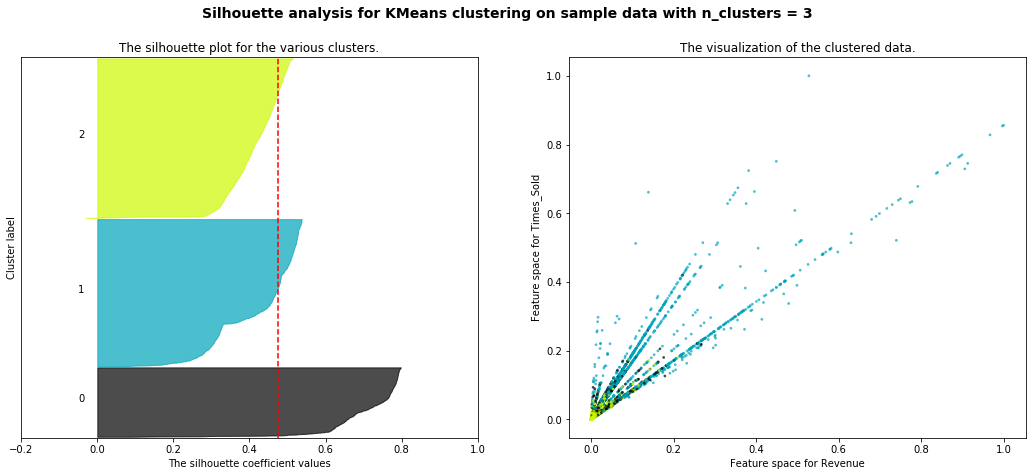

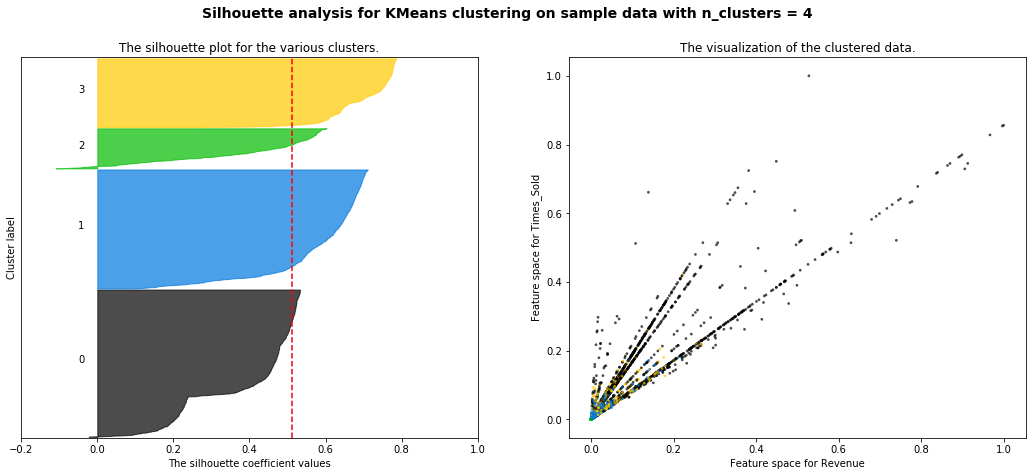

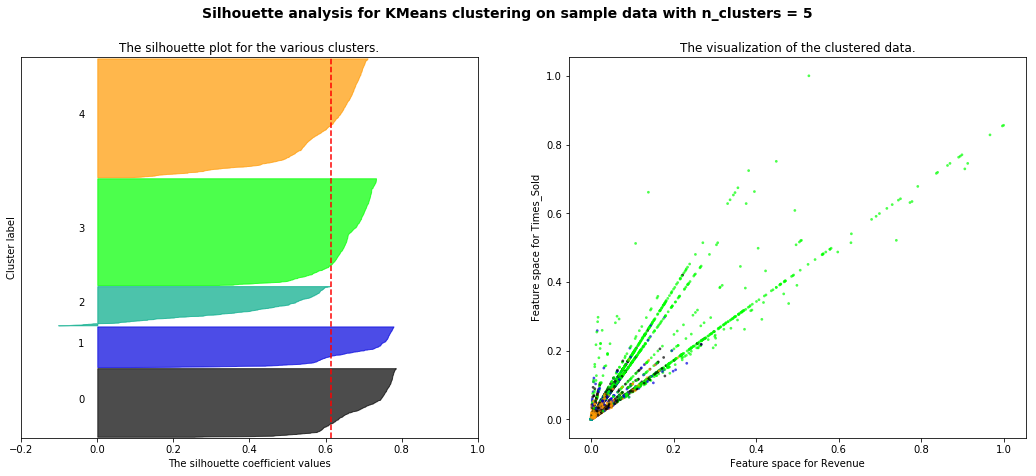

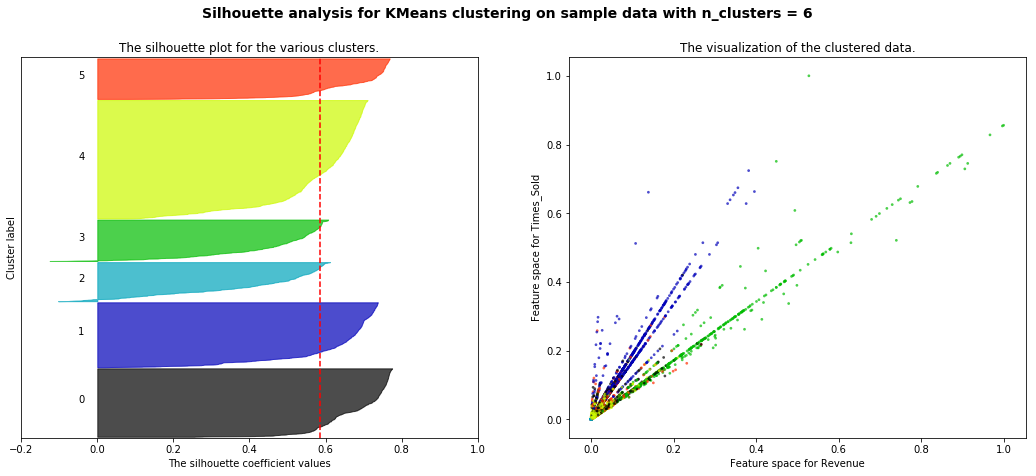

In [50]:
mod_names = []
for i in [2,3,4,5,6] : 
    mod = km_cluster(cluster_df, i)
    mod_names.append(mod)


In [51]:
num_col = ["Norm_Approx_MRP", "Norm_Times_Sold", "Norm_Revenue"]
pval_df, fval_df = pd.DataFrame(), pd.DataFrame()
pval_df["Mod_Name"] = pd.Series(mod_names)
fval_df["Mod_Name"] = pd.Series(mod_names) 
for num in num_col : 
    pval = []
    fval = []
    for i in mod_names :
        l = p_f_val(comp_prod, num, i)
        pval.append(l[0])
        fval.append(l[1])
    pval_df[num] = pd.Series(pval)
    fval_df[num] = pd.Series(fval)


In [52]:
pval_df

,Mod_Name,Norm_Approx_MRP,Norm_Times_Sold,Norm_Revenue
0,km_2,0.000000,0.000000,0.000000
1,km_3,0.000000,0.000000,0.000000
2,km_4,0.000000,0.000000,0.000000
3,km_5,0.003586,0.006797,0.001102
4,km_6,0.000000,0.000000,0.000111


In [53]:
fval_df

,Mod_Name,Norm_Approx_MRP,Norm_Times_Sold,Norm_Revenue
0,km_2,82.159012,1317.627240,879.751881
1,km_3,27.585505,280.439730,178.016909
2,km_4,64.387073,625.755911,452.248207
3,km_5,8.493339,7.334182,10.664685
4,km_6,64.648913,120.854072,14.975652


In [193]:
# From the above, we see that we can either go with 3 clusters or with 5 clusters

In [132]:
good_mods = pval_df.loc[(pval_df["Norm_Approx_MRP"] == 0) & (pval_df["Norm_Times_Sold"] == 0) & \
                       (pval_df["Norm_Revenue"] == 0)]["Mod_Name"].tolist()
good_mods = ["km_2", "km_4"]

In [55]:
del_col = list(set(mod_names) - set(good_mods))
comp_prod.drop(del_col, axis =1 , inplace = True)

In [56]:
def box_plot(df, colname, feature, orient) : 
    if orient == 'h':
        plt.figure(figsize = (16,6))
        sns.boxplot(x = feature, y = colname , data = df, palette='BuGn')
        s = colname + " wrt " + feature
        plt.title(s, fontsize = 20)
        plt.xlabel(feature, fontsize = 15)
        plt.ylabel(colname, fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.xticks(fontsize = 15)
        #plt.xticks()
        s = s + ".jpg"
        plt.savefig(s)
        plt.show()
    elif orient == 'v':
        plt.figure(figsize = (16,6))
        sns.boxplot(y = feature, x = colname , data = df, palette = 'BuGn')
        s = colname + " wrt " + feature
        plt.title(s, fontsize = 20)
        plt.xlabel(colname, fontsize = 15)
        plt.ylabel(feature, fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.xticks(fontsize = 15)
        s = s + ".jpg"
        plt.savefig(s)
        plt.show()

In [133]:
good_mods.append('kmod_cat')
good_mods.append('kmod_pc')

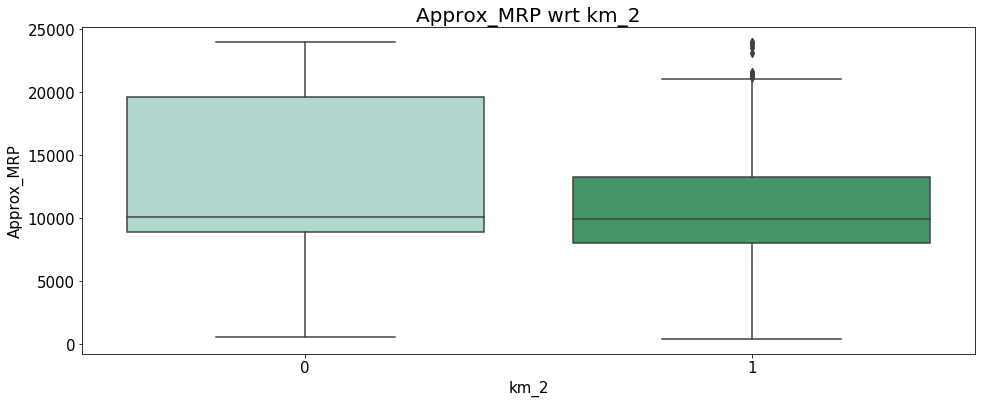

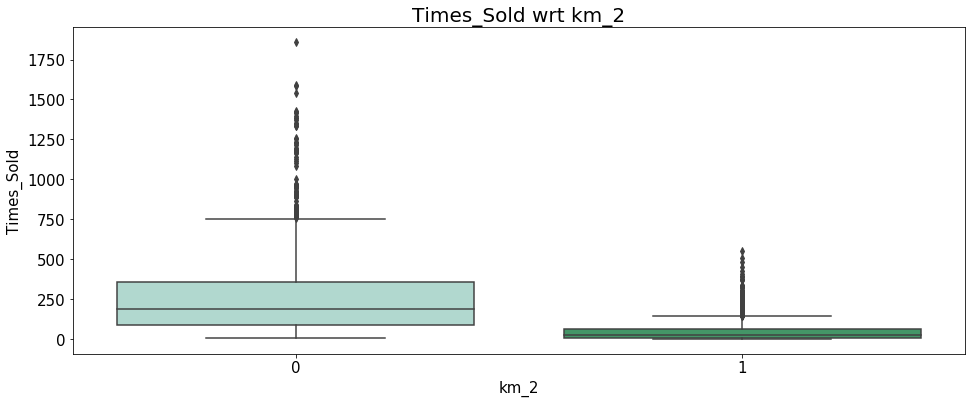

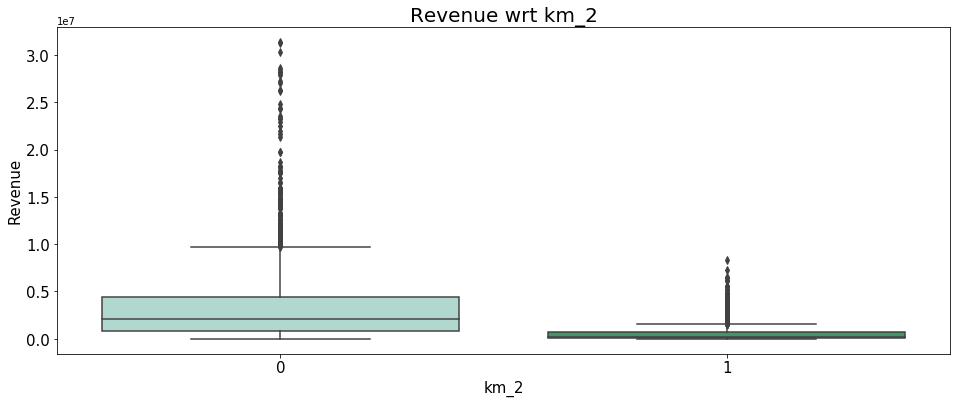

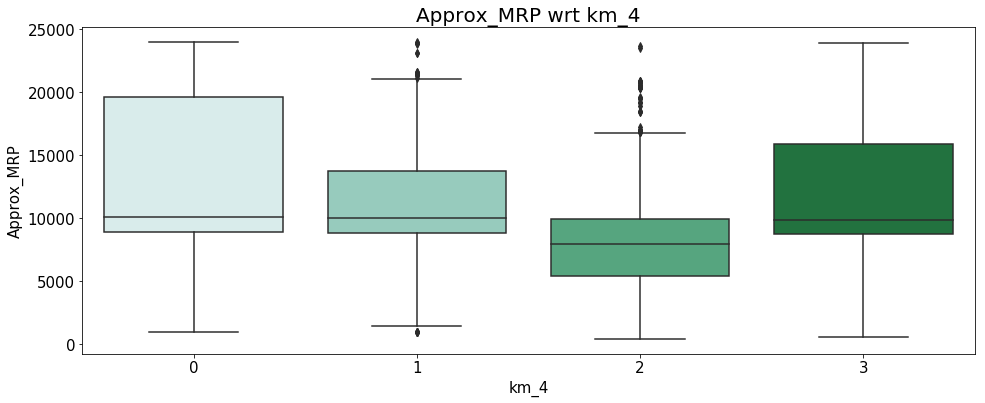

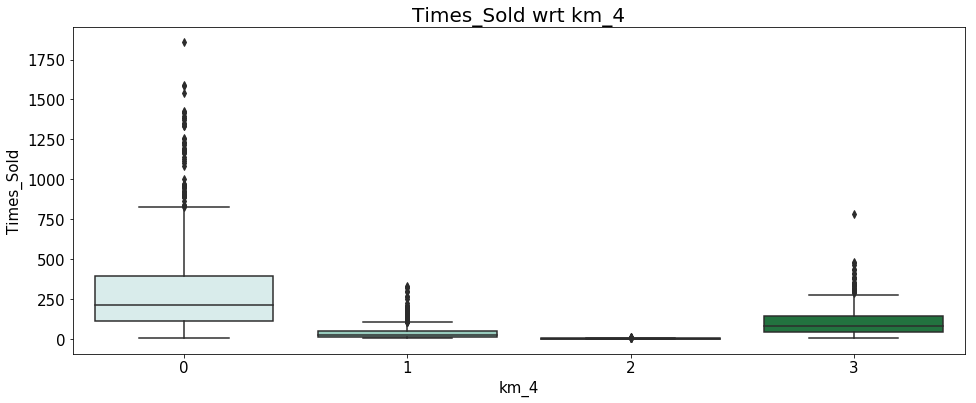

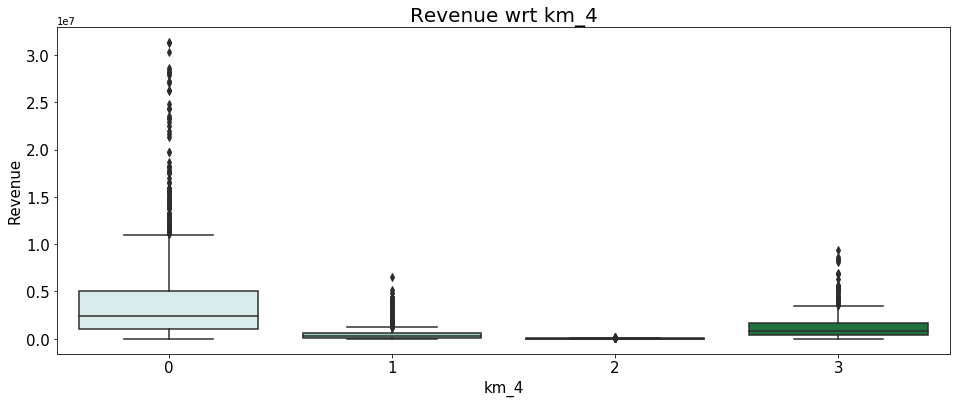

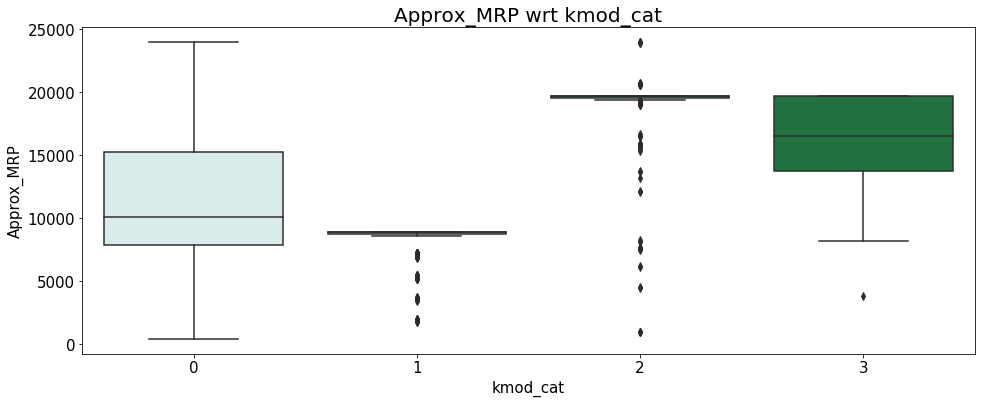

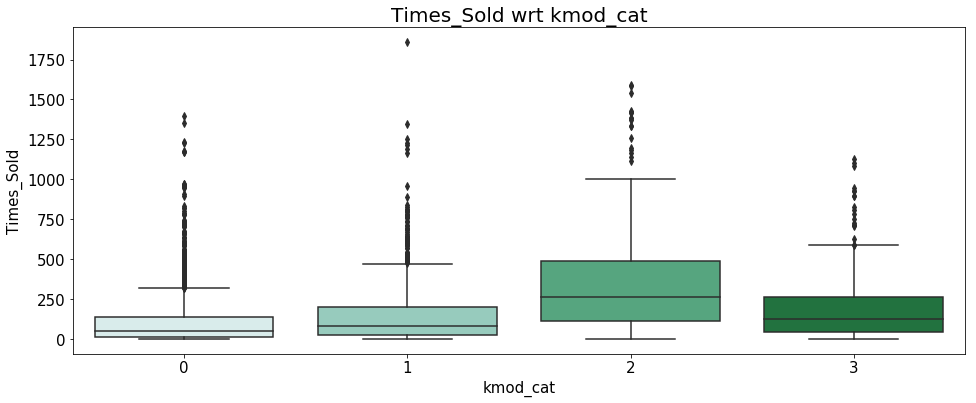

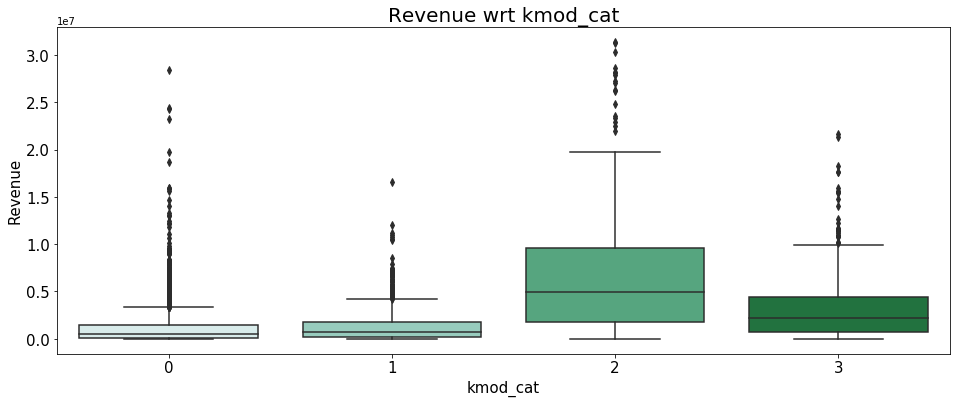

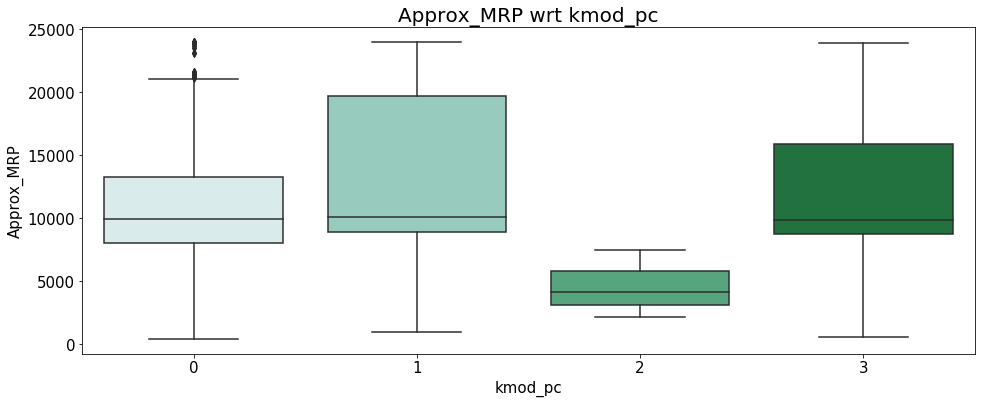

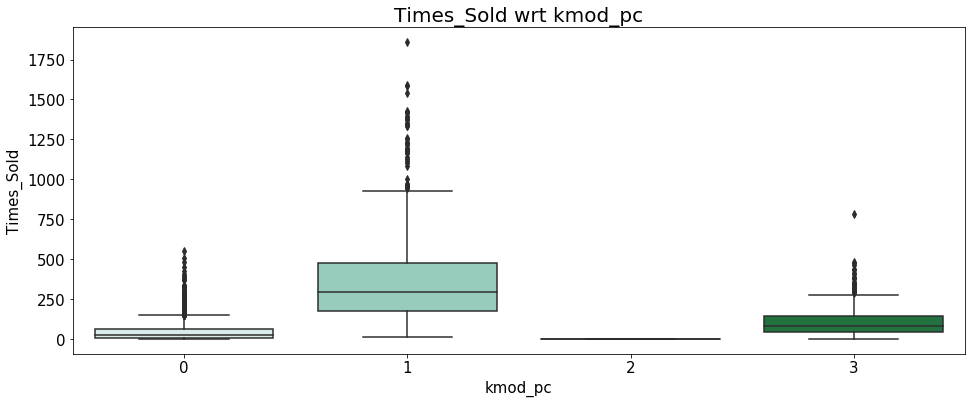

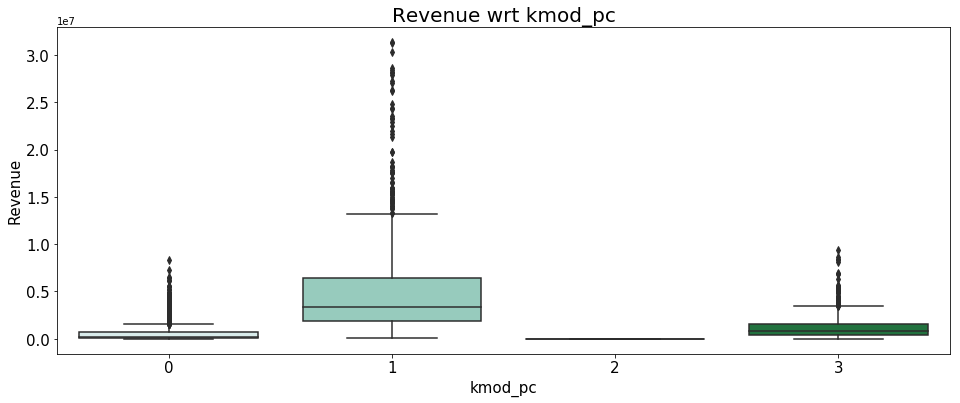

In [134]:
for i in good_mods : 
    comp_prod[i] = comp_prod[i].apply(lambda x : str(x))
    box_plot(comp_prod, "Approx_MRP", i, "h")
    box_plot(comp_prod, "Times_Sold", i, "h")
    box_plot(comp_prod, "Revenue", i, "h")

In [60]:
km_4 = comp_prod.groupby(['km_4'])["Norm_Approx_MRP", "Norm_Times_Sold", "Norm_Revenue"].agg(['count', 'mean', 'median'])
km_4

Norm_Approx_MRP                  Norm_Times_Sold                   \
               count      mean median           count      mean median   
km_4                                                                     
0               1422  0.516026  0.411            1422  0.157909  0.115   
1               1149  0.463871  0.406            1149  0.021903  0.013   
2                387  0.349287  0.319             387  0.000961  0.001   
3                665  0.465254  0.400             665  0.056364  0.045   

     Norm_Revenue                   
            count      mean median  
km_4                                
0            1422  0.126076  0.077  
1            1149  0.015794  0.009  
2             387  0.000716  0.000  
3             665  0.040608  0.026

In [65]:
km_cat= comp_prod.groupby(['kmod_cat'])["Norm_Approx_MRP", "Norm_Times_Sold", "Norm_Revenue"].agg(['count', 'mean', 'median'])
km_cat

Norm_Approx_MRP                  Norm_Times_Sold                    \
                   count      mean median           count      mean  median   
kmod_cat                                                                      
0                   2045  0.457763  0.410            2045  0.058449  0.0250   
1                    966  0.339862  0.360             966  0.082289  0.0430   
2                    294  0.765459  0.819             294  0.189102  0.1410   
3                    318  0.697695  0.683             318  0.103619  0.0655   

         Norm_Revenue                   
                count      mean median  
kmod_cat                                
0                2045  0.041380  0.015  
1                 966  0.043424  0.023  
2                 294  0.216663  0.159  
3                 318  0.108299  0.069

In [135]:
kmod_pc= comp_prod.groupby(['kmod_pc'])["Norm_Approx_MRP", "Norm_Times_Sold", "Norm_Revenue"].agg(['count', 'mean', 'median'])
kmod_pc

Norm_Approx_MRP                  Norm_Times_Sold                   \
                  count      mean median           count      mean median   
kmod_pc                                                                     
0                  1917  0.441495  0.403            1917  0.025067  0.012   
1                  1034  0.535438  0.411            1034  0.195383  0.156   
2                     3  0.177000  0.157               3  0.000000  0.000   
3                   669  0.464613  0.400             669  0.056034  0.045   

        Norm_Revenue                   
               count      mean median  
kmod_pc                                
0               1917  0.017564  0.008  
1               1034  0.158637  0.109  
2                  3  0.000000  0.000  
3                669  0.040368  0.026

In [68]:
km_2= comp_prod.groupby(['km_2'])["Norm_Approx_MRP", "Norm_Times_Sold", "Norm_Revenue"].agg(['count', 'mean', 'median'])
km_2

Norm_Approx_MRP                  Norm_Times_Sold                   \
               count      mean median           count      mean median   
km_2                                                                     
0               1699  0.507968  0.410            1699  0.140970  0.099   
1               1924  0.440909  0.403            1924  0.024979  0.012   

     Norm_Revenue                   
            count      mean median  
km_2                                
0            1699  0.112440  0.066  
1            1924  0.017502  0.007

In [ ]:
# Highest revenue cluster is 3 

In [69]:

km_4_prod_df =  comp_prod.loc[comp_prod["km_4"] == '0'].sort_values(by = "Norm_Revenue", ascending = False)[:100]


In [70]:
km4_prod = km_4_prod_df["Product_ID"].tolist()

In [474]:
for i in km4_prod: 
    print(i, end = "\t")

P00110742	P00025442	P00112142	P00059442	P00255842	P00057642	P00184942	P00046742	P00145042	P00237542	P00110942	P00010742	P00110842	P00148642	P00028842	P00242742	P00080342	P00052842	P00114942	P00270942	P00112542	P00044442	P00334242	P00111142	P00005042	P00112442	P00128942	P00073842	P00113242	P00105142	P0097242	P00147942	P00120042	P00182142	P00036842	P00265242	P00062842	P00277642	P00116842	P00355142	P00295942	P00071442	P00085942	P00000142	P00140742	P00249542	P00057942	P00116142	P00121342	P00318742	P00127642	P00113142	P00037142	P00111742	P00144642	P00221442	P00070042	P00002142	P00058042	P00125942	P00338442	P00142142	P00329542	P00243942	P00057742	P00113342	P00101842	P00085342	P00277442	P00216342	P00351142	P00051442	P00233542	P00004742	P00129842	P00154042	P00173842	P00117942	P00193542	P00031042	P00127842	P00100442	P00159542	P00070342	P00127242	P00030842	P00346142	P00177542	P00201442	P00303342	P00115142	P00289942	P00034042	P00248942	P00090942	P00147742	P00182242	P00220442	P00207942	P00103042	

In [72]:
def prod_list (modname, cluster) : 
    df = comp_prod.loc[comp_prod[modname] == cluster].sort_values(by = "Norm_Revenue", ascending = False)[:100]
    prods = df["Product_ID"].tolist()
    return df, prods

In [74]:
kmod_df, kmod_prod = prod_list('kmod_cat', '2')
len(kmod_prod)

100

In [137]:
kpc_df, kpc_prod = prod_list('kmod_2', '1')
len(kpc_prod)

100

In [76]:
km2_df, km2_prod = prod_list('km_2', '0')
len(km2_prod)

100

In [138]:
km4_df, km4_prod = prod_list('km_4', '0')
len(km4_prod)

100

In [140]:
sell_100 = comp_prod.sort_values(by = "Times_Sold", ascending = False)[:100]
s100 = sell_100["Product_ID"].tolist()
exp_100 = comp_prod.sort_values(by = "Approx_MRP", ascending = False)[:100]
e100 = exp_100["Product_ID"].tolist()
rev_100 = comp_prod.sort_values(by = "Revenue", ascending = False)[:100]
r100 = rev_100["Product_ID"].tolist()

In [141]:
mods = [sell_100, exp_100, km4_df, kpc_df]
eval_df = pd.DataFrame()
eval_df["mods"] = ['sell_100', 'exp_100', 'km_4', 'kmod_pc']

In [142]:
at, mrp, pop, cc, rev = [], [], [], [], []
for i in mods : 
    
    a = i["all_types"].sum()
    m = i["Norm_Approx_MRP"].sum()
    p = i["Norm_Times_Sold"].sum()
#c = i["Common_Cat"].sum()
    r = i["Norm_Revenue"].sum()
    at.append(a)
    mrp.append(m)
    pop.append(p)
    #cc.append(c)
    rev.append(r)

In [143]:
eval_df["Approx_MRP"] = pd.Series(mrp)
eval_df["Times_Sold"] = pd.Series(pop)
eval_df["Revenue"] = pd.Series(rev)
eval_df["All_Types"] = pd.Series(at)
#eval_df["Common_Cat"] = pd.Series(cc)


In [144]:
eval_df

,mods,Approx_MRP,Times_Sold,Revenue,All_Types
0,sell_100,61.809,53.201,48.000,94.0
1,exp_100,90.888,7.667,10.205,13.0
2,km_4,79.037,48.300,53.383,92.0
3,kmod_pc,79.037,48.300,53.383,92.0


In [95]:
#best products : 
best100  = set(s100) & set(e100) & set(r100)
len(best100)

1

In [96]:
sell_100 = comp_prod.sort_values(by = "Times_Sold", ascending = False)[:362]
s100 = sell_100["Product_ID"].tolist()
exp_100 = comp_prod.sort_values(by = "Approx_MRP", ascending = False)[:362]
e100 = exp_100["Product_ID"].tolist()
rev_100 = comp_prod.sort_values(by = "Revenue", ascending = False)[:362]
r100 = rev_100["Product_ID"].tolist()

In [97]:
b10p = set(s100) & set(e100) & set(r100)
len(b10p)

62

In [98]:
c100 = set(km4_prod) & set(kpc_prod)
len(c100)

100

In [100]:
c100_2 = set(km4_prod) & set(kmod_prod)
len(c100_2)

56

In [104]:
cc = set(c100_2) | set(b10p)
len(cc)

92

In [111]:
extra = set(km4_prod) - set(cc)
len(extra)

25

In [112]:
ex_prod = comp_prod.loc[comp_prod["Product_ID"].isin(extra)].sort_values(by = "Revenue", ascending = False)["Product_ID"][:8].tolist()

In [113]:
len(ex_prod)

8

In [114]:
t100 = set(cc) | set(ex_prod)
len(t100)

100

In [115]:
t100_df = comp_prod.loc[comp_prod["Product_ID"].isin(t100)]

In [510]:
km = KMeans(n_clusters=4, random_state= 12)

In [511]:
km.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

In [512]:
c = km.cluster_centers_

In [513]:
len(c)

4

In [514]:
c

array([[ 1.00000000e+00,  1.00000000e+00,  1.33226763e-15,
         9.97446617e-01,  9.51130827e-01,  8.92252632e-01,
         9.97595489e-01,  9.93911278e-01,  5.63639098e-02,
         4.65254135e-01,  4.06075188e-02,  3.01118797e-01,
         2.82163910e-01,  7.50210526e-02],
       [-1.88737914e-15,  1.00000000e+00,  2.63015551e-01,
         9.94833671e-01,  9.16530764e-01,  7.75457066e-01,
         9.94640297e-01,  9.74508452e-01,  3.21250845e-02,
         4.65329277e-01,  2.24935767e-02,  3.57110210e-01,
         2.70379986e-01,  6.55841785e-02],
       [ 8.98876404e-03,  9.93258427e-01,  1.79775281e-02,
         7.86397753e-01,  4.03487640e-01,  1.84060674e-01,
         5.56543820e-01,  4.62146067e-01,  1.22696629e-03,
         3.59743820e-01,  9.10112360e-04,  3.71337079e-01,
         1.42534831e-01,  1.54808989e-02],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  9.92323985e-01,  9.83507737e-01,
         1.00000000e+00,  9.99624758e-01,  1.

In [515]:
c_df = pd.DataFrame(c, columns = list(cluster_df))

In [517]:
c_df[["Norm_Approx_MRP", "Norm_Times_Sold", "Norm_Revenue"]]

,Norm_Approx_MRP,Norm_Times_Sold,Norm_Revenue
0,0.465254,0.056364,0.040608
1,0.465329,0.032125,0.022494
2,0.359744,0.001227,0.000910
3,0.535438,0.195383,0.158637


In [519]:
km4_prod[:5]

['P00110742', 'P00025442', 'P00112142', 'P00059442', 'P00255842']

In [87]:
uq_cust = pd.read_csv("Unique_Customer_Dataframe.csv", index_col = 0)

In [88]:
uq_cust["SP"] = uq_cust["Tot_Amt_Spent"] / uq_cust["Num_Items"]

In [89]:
bfw = pd.read_csv("Feature_Engg_BFW_Sales.csv", index_col = 0)

In [557]:
bfw["Revenue"] = bfw["Approx_MRP"] * bfw["Times_Sold"]

In [90]:
normalizer(uq_cust, "SP")

Norm_SP


<Figure size 1008x576 with 0 Axes>

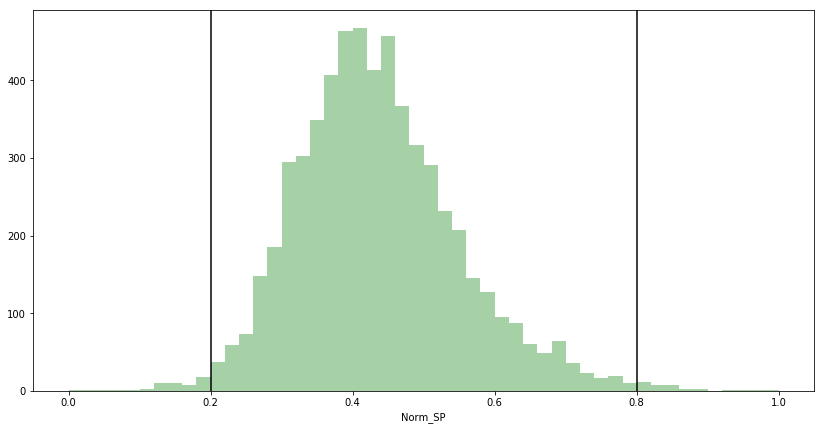

In [130]:
plt.figure(figsize = (14,8))
f, ax = plt.subplots(figsize = (14,7))
sns.distplot(uq_cust["Norm_SP"], kde = False, color = "forestgreen", ax =  ax)
ax.axvline(0.2, color='k', linestyle='-')
ax.axvline(0.8, color='k', linestyle='-')
plt.show()
